# Linear Transformation

In [1]:
import numpy as np
import cv2

<a name='1'></a>
## 1 - Transformations

A **transformation** is a function from one vector space to another that respects the underlying (linear) structure of each vector space. Referring to a specific transformation, you can use a symbol, such as $T$. Specifying the spaces containing the input and output vectors, e.g. $\mathbb{R}^2$ and $\mathbb{R}^3$, you can write $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$. Transforming vector $v \in \mathbb{R}^2$ into the vector $w\in\mathbb{R}^3$ by the transformation $T$, you can use the notation $T(v)=w$ and read it as "*T of v equals to w*" or "*vector w is an **image** of vector v with the transformation T*".

The following Python function corresponds to the transformation $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$ with the following symbolic formula:

$$T\begin{pmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix}
          \tag{1}
          $$

In [2]:
def T(v):
    w = np.zeros((3,1))
    w[0,0] = 3*v[0]
    w[2,0] = -2*v[1]

    return w

v = np.array([3,5])
w = T(v)

print("Original vector:\n", v.reshape((2,1)), "\n\n Result of the transformation:\n", w)

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9.]
 [  0.]
 [-10.]]


## 2 - Linear Transformations

A transformation $T$ is said to be **linear** if the following two properties are true for any scalar $k$, and any input vectors $u$ and $v$:

1. $T(kv)=kT(v)$,
2. $T(u+v)=T(u)+T(v)$.

In the example above $T$ is a linear transformation:

$$T (kv) =
          T \begin{pmatrix}\begin{bmatrix}
          kv_1 \\
          kv_2
          \end{bmatrix}\end{pmatrix} = 
          \begin{bmatrix}
           3kv_1 \\
           0 \\
           -2kv_2
          \end{bmatrix} =
          k\begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix} = 
          kT(v),\tag{2}$$
          
$$T (u+v) =
          T \begin{pmatrix}\begin{bmatrix}
          u_1 + v_1 \\
          u_2 + v_2
          \end{bmatrix}\end{pmatrix} = 
          \begin{bmatrix}
           3(u_1+v_1) \\
           0 \\
           -2(u_2+v_2)
          \end{bmatrix} = 
          \begin{bmatrix}
           3u_1 \\
           0 \\
           -2u_2
          \end{bmatrix} +
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix} = 
          T(u)+T(v).\tag{3}$$

In [3]:
u = np.array([2,3])
v = np.array([1,-1])

k = 7

print(f"T(kv): \n{T(k*v)}")
print(f"\nkT(v): \n{k*T(v)}")

T(kv): 
[[21.]
 [ 0.]
 [14.]]

kT(v): 
[[21.]
 [ 0.]
 [14.]]


In [4]:
print(f"t(u+v): \n{T(u+v)}")
print(f"\nT(u) + t(v): \n{T(u) + T(v)}")

t(u+v): 
[[ 9.]
 [ 0.]
 [-4.]]

T(u) + t(v): 
[[ 9.]
 [ 0.]
 [-4.]]


<a name='3'></a>
## 3 - Transformations Defined as a Matrix Multiplication

Let $L: \mathbb{R}^m \rightarrow \mathbb{R}^n$ be defined by a matrix $A$, where $L(v)=Av$, multiplication of the matrix $A$ ($n\times m$) and vector $v$ ($m\times 1$) resulting in the vector $w$ ($n\times 1$).

 $L: \mathbb{R}^2 \rightarrow \mathbb{R}^3$:

$$L\begin{pmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix}=
          \begin{bmatrix}
           ? & ? \\
           ? & ? \\
           ? & ?
          \end{bmatrix}
          \begin{bmatrix}
           v_1 \\
           v_2
          \end{bmatrix}
          \tag{4}
          $$


$$L\begin{pmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          A\begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}=
          \begin{bmatrix}
           a_{1,1} & a_{1,2} \\
           a_{2,1} & a_{2,2} \\
           a_{3,1} & a_{3,2}
          \end{bmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}=
          \begin{bmatrix}
           a_{1,1}v_1+a_{1,2}v_2 \\
           a_{2,1}v_1+a_{2,2}v_2 \\
           a_{3,1}v_1+a_{3,2}v_2 \\
          \end{bmatrix}=
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix}\tag{5}
          $$

In [5]:
def L(v):

    A = np.array([[3,0],[0,0],[0,-2]])
    print("Transformation matrix:\n", A, "\n")

    return A @ v

v = np.array([3, 5])

w = L(v)

print("Original vector:\n", v.reshape((2,1)), "\n\n Result of the transformation:\n", w.reshape((3,1)))


Transformation matrix:
 [[ 3  0]
 [ 0  0]
 [ 0 -2]] 

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9]
 [  0]
 [-10]]


<a name='4'></a>
## 4 - Standard Transformations in a Plane
A linear transformation $L: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ can be represented as a multiplication of a $2 \times 2$ matrix and a coordinate vector $v\in\mathbb{R}^2.$ Note that so far you have been using some random vector $v\in\mathbb{R}^2.$ (e.g. $v=\begin{bmatrix}3 \\ 5\end{bmatrix}$). To have a better intuition of what the transformation is really doing in the $\mathbb{R}^2$ space, it is wise to choose vector $v$ in a less random way. 

A good choice would be vectors of a standard basis $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ and $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$. Let's apply linear transformation $L$ to each of the vectors $e_1$ and $e_2$: $L(e_1)=Ae_1$ and $L(e_2)=Ae_2$. If you put vectors $\{e_1, e_2\}$ into columns of a matrix and perform matrix multiplication

$$A\begin{bmatrix}e_1 & e_2\end{bmatrix}=\begin{bmatrix}Ae_1 & Ae_2\end{bmatrix}=\begin{bmatrix}L(e_1) & L(e_2)\end{bmatrix},\tag{3}$$

you can note that $\begin{bmatrix}e_1 & e_2\end{bmatrix}=\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}$ (identity matrix). Thus, $A\begin{bmatrix}e_1 & e_2\end{bmatrix} = AI=A$, and

$$A=\begin{bmatrix}L(e_1) & L(e_2)\end{bmatrix}.\tag{4}$$

This is a matrix with the columns that are the images of the vectors of the standard basis. 

This choice of vectors \{$e_1, e_2$\} provides opportinuty for the visual representation of the linear transformation $L$.

<a name='4.1'></a>
### 4.1 - Example 1: Horizontal Scaling (Dilation)

Horizontal scaling (factor $2$ in this example) can be defined considering transformation of a vector $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ into a vector $\begin{bmatrix}2 \\ 0\end{bmatrix}$ and leaving vector $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$ without any changes.

In [6]:
#e1 -> (2,0)
#e3 -> (0,1)
def T_Scaling(v):

    A = np.array([[2,0], [0,1]])

    w = A @ v

    return w

def transform_vectors(T, v1, v2):

    V = np.vstack((v1, v2))
    W = T(V)

    return W

e1 = np.array([1,0])
e2 = np.array([0,1])

transformation_result_hscaling = transform_vectors(T_Scaling, e1, e2)
print(f"e1 = {e1}")
print(f"e2 = {e2}")
print(f"\nResult of the transformation (matrix form):\n{transformation_result_hscaling}")

e1 = [1 0]
e2 = [0 1]

Result of the transformation (matrix form):
[[2 0]
 [0 1]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_transformation(T, e1, e2):
    color_original = "#129cab"
    color_transformed = "#cc8933"
    
    _, ax = plt.subplots(figsize=(7, 7))
    ax.set_xticks(np.arange(-5, 6))
    ax.set_yticks(np.arange(-5, 6))
    ax.set_aspect("equal")
    ax.grid(True)

    # Vetores originais
    plt.quiver(0, 0, e1[0], e1[1], color=color_original, angles='xy', scale_units='xy', scale=1)
    plt.quiver(0, 0, e2[0], e2[1], color=color_original, angles='xy', scale_units='xy', scale=1)

    ax.text(e1[0], e1[1], "$e_1$", color=color_original, fontsize=14)
    ax.text(e2[0], e2[1], "$e_2$", color=color_original, fontsize=14)

    # Transformação
    e1_t = T(e1)
    e2_t = T(e2)

    plt.quiver(0, 0, e1_t[0], e1_t[1], color=color_transformed, angles='xy', scale_units='xy', scale=1)
    plt.quiver(0, 0, e2_t[0], e2_t[1], color=color_transformed, angles='xy', scale_units='xy', scale=1)

    ax.text(e1_t[0] + 0.1, e1_t[1] + 0.1, "$T(e_1)$", color=color_transformed, fontsize=14)
    ax.text(e2_t[0] + 0.3, e2_t[1] - 0.3, "$T(e_2)$", color=color_transformed, fontsize=14)

    plt.axis([-5, 5, -5, 5])
    plt.show()

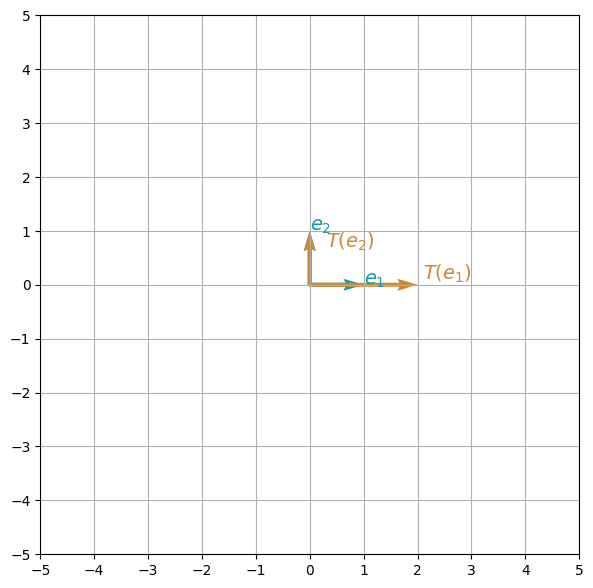

In [8]:
plot_transformation(T_Scaling, e1, e2)

<a name='4.2'></a>
### 4.2 - Example 2: Reflection about y-axis (the vertical axis)

In [9]:
#e1 -> (1,-1)
#e2 -> (0,-1)

def T_Reflection(v):

    A = np.array([[-1,0],[0,1]])

    w = A @ v

    return w

transformation_result_reflection = transform_vectors(T_Reflection, e1, e2)

print(f"e1 = {e1}")
print(f"e2 = {e2}")
print(f"\nResult of the transformation (matrix form):\n{transformation_result_reflection}")

e1 = [1 0]
e2 = [0 1]

Result of the transformation (matrix form):
[[-1  0]
 [ 0  1]]


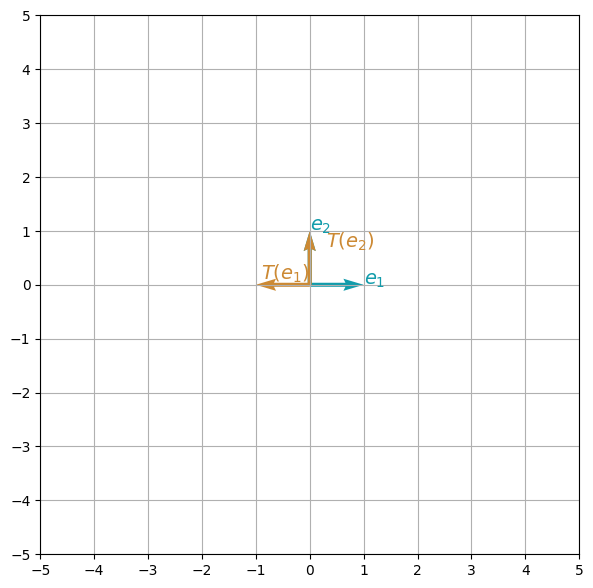

In [10]:
plot_transformation(T_Reflection, e1, e2)

<a name='5'></a>
## 5 - Application of Linear Transformations: Computer Graphics

A large number of basic geometric shapes is used in computer graphics. Such shapes (e.g. triangles, quadrilaterals) are defined by their vertexes (corners). Linear transformations are often used to generate complex shapes from the basic ones, through scaling, reflection, rotation, shearing etc. It provides opportunity to manipulate those shapes efficiently. 

The software responsible for rendering of graphics, has to process the coordinates of millions of vertexes. The use of matrix multiplication to manipulate coordinates helps to merge multiple transformations together, just applying matrix multiplication one by one in a sequence. And another advantage is that the dedicated hardware, such as Graphics Processing Units (GPUs), is designed specifically to handle these calculations in large numbers with high speed.

So, matrix multiplication and linear transformations give you a super power, especially on scale!

Here is an example where linear transformations could have helped to reduce the amount of work preparing the image:


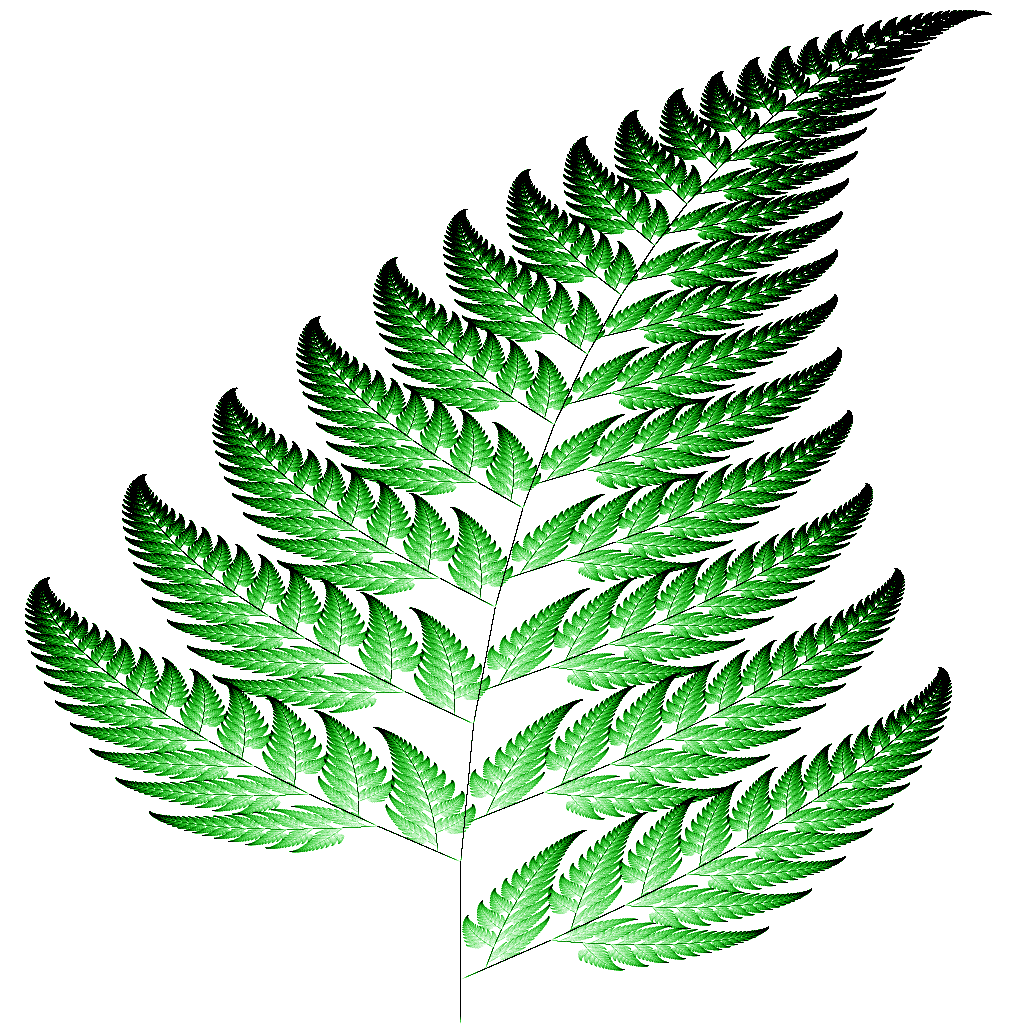


All of the subleafs are similar and can be prepared as just linear transformations of one original leaf.

Let's see a simple example of two transformations applied to a leaf image. 

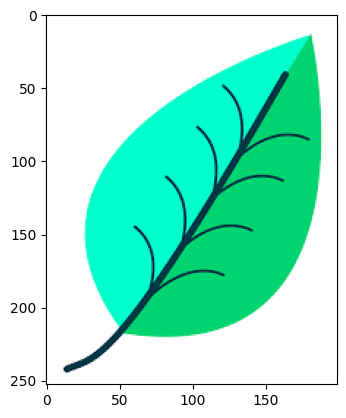

In [11]:
img = cv2.imread('download.png')
plt.imshow(img)

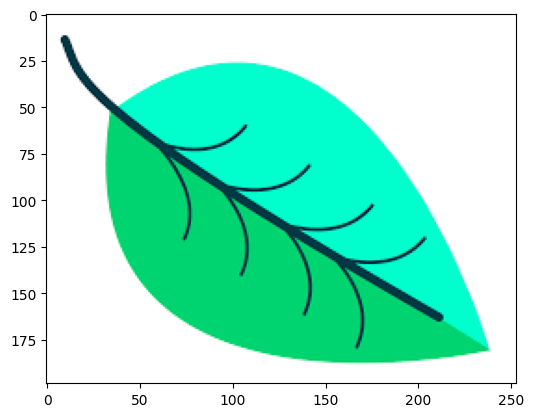

In [12]:
Image_rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(Image_rotated)

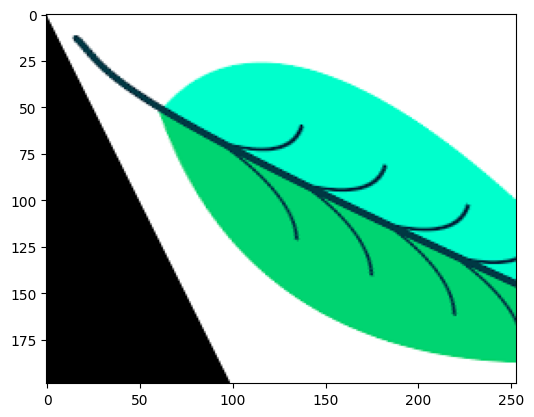

In [13]:
rows, cols , _ =Image_rotated.shape
M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
Image_rotated_sheared = cv2.warpPerspective(Image_rotated, M, (int(cols), int(rows)))
plt.imshow(Image_rotated_sheared)

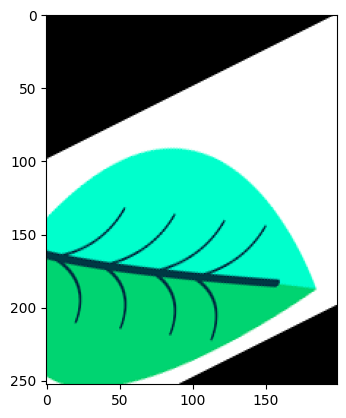

In [14]:
image_sheared = cv2.warpPerspective(img, M, (int(cols), int(rows)))
Image_sheared_rotated = cv2.rotate(image_sheared, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(Image_sheared_rotated)

Comparing last two images, you can clearly see that the outputs are different. This is because linear transformation can be defined as a matrix multiplication. Then, applying two transformations in a row, e.g. with matrices $A$ and $B$, you perform multiplications $B(Av)=(BA)v$, where $v$ is a vector. And remember, that generally you cannot change the order in the matrix multiplication (most of the time $BA\neq AB$).

In [15]:
M_rotation_90 = np.array([[0,1], [-1,0]])
M_shear_x = np.array([[1,0.5], [0,1]])

print("90 degrees rotation matrix:\n", M_rotation_90)
print("Matrix for the shear along x-axis:\n", M_shear_x)

90 degrees rotation matrix:
 [[ 0  1]
 [-1  0]]
Matrix for the shear along x-axis:
 [[1.  0.5]
 [0.  1. ]]


In [16]:
print("M_rotation_90 by M_shear_x:\n", M_rotation_90 @ M_shear_x)
print("M_shear_x by M_rotation_90:\n", M_shear_x @ M_rotation_90)

M_rotation_90 by M_shear_x:
 [[ 0.   1. ]
 [-1.  -0.5]]
M_shear_x by M_rotation_90:
 [[-0.5  1. ]
 [-1.   0. ]]
